In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Training Data
traindata = pd.read_csv('./mnist_dataset/mnist_train.csv')
traindata = np.array(traindata)
m, n = traindata.shape

np.random.shuffle(traindata)
traindata = traindata.T

Y_train = traindata[0]
X_train = traindata[1:n]
X_train = X_train / 255

# Test Data
testdata = pd.read_csv('./mnist_dataset/mnist_test.csv')
testdata = np.array(testdata)
m, n = testdata.shape

np.random.shuffle(testdata)
testdata = testdata.T

Y_test = testdata[0]
X_test = testdata[1:n]
X_test = X_test / 255

In [21]:
# Base Functions

def ParamsInit():
    # He Intitialization

    w1 = np.random.randn(128, 784) * np.sqrt(2./784)
    b1 = np.zeros((128, 1))

    w2 = np.random.randn(64, 128) * np.sqrt(2./128)
    b2 = np.zeros((64, 1))

    w3 = np.random.randn(10, 64) * np.sqrt(2./64)
    b3 = np.zeros((10, 1))

    return w1, b1, w2, b2, w3, b3

def ReLu(input):
    # Returns 0 if below 0 and input if above 0
    return np.maximum(input, 0)

def ReLuDerivative(input):
    # Returns 1 if input > 0 and otherwise will return 0.
    return input > 0

def Softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def OneHot(Y):
    OneHotY = np.zeros((Y.size, Y.max() + 1))
    OneHotY[np.arange(Y.size), Y] = 1
    OneHotY = OneHotY.T
    return OneHotY

def ForwardProp(w1, b1, w2, b2, w3, b3, X):

    Z1 = w1.dot(X) + b1
    A1 = ReLu(Z1)

    Z2 = w2.dot(A1) + b2
    A2 = ReLu(Z2)

    Z3 = w3.dot(A2) + b3
    A3 = Softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

def BackProp(Z1, A1, Z2, A2, A3, X, Y, w3, w2):

    OneHotY = OneHot(Y)
    M = Y.size
    
    # Output Layer
    dz3 = A3 - OneHotY # Calculuate Loss
    dw3 = (1 / M) * dz3.dot(A2.T)
    db3 = (1 / M) * np.sum(dz3, axis=0) 

    # Layer 2
    dz2 = w3.T.dot(dz3) * ReLuDerivative(Z2)
    dw2 = (1 / M) * dz2.dot(A1.T)
    db2 = (1 / M) * np.sum(dz2, axis=0)

    # Layer 1
    dz1 = w2.T.dot(dz2) * ReLuDerivative(Z1) 
    dw1 = (1 / M) * dz1.dot(X.T) 
    db1 = (1 / M) * np.sum(dz1, axis=0) 

    return dw1, db1, dw2, db2, dw3, db3

def UpdateParams(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1

    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    w3 = w3 - alpha * dw3
    b3 = b3 - alpha * db3

    return w1, b1, w2, b2, w3, b3

In [32]:
# Gradient Descent

def GetPred(A3):
    return np.argmax(A3, 0)

def GetAccuracy(Predictions, Y):
    print(Predictions, Y)
    return np.sum(Predictions == Y) / Y.size

def GradientDescent(X, Y, EpochCount, alpha):
    w1, b1, w2, b2, w3, b3 = ParamsInit()

    for i in range(EpochCount):
        # Forward Propagation
        Z1, A1, Z2, A2, Z3, A3 = ForwardProp(w1, b1, w2, b2, w3, b3, X)

        # Backward Propagation (Z3 is discarded here because we do not need to use it when calculating loss.)
        dw1, db1, dw2, db2, dw3, db3 = BackProp(Z1, A1, Z2, A2, A3, X, Y, w3, w2)

        # Adjust Parameters
        w1, b1, w2, b2, w3, b3 = UpdateParams(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, alpha)

        if (i % 10 == 0):
            print("Epoch:", i)
            print(f'Accuracy: {(GetAccuracy(GetPred(A3), Y) * 100)}%')

    return w1, b1, w2, b2, w3, b3

In [33]:
w1, b1, w2, b2, w3, b3 = GradientDescent(X_train, Y_train, 200, 0.1)

Epoch: 0
[5 9 6 ... 6 6 5] [0 0 6 ... 0 8 4]
Accuracy: 14.535%
Epoch: 10
[0 0 6 ... 0 0 0] [0 0 6 ... 0 8 4]
Accuracy: 58.29333333333333%
Epoch: 20
[0 0 6 ... 0 8 0] [0 0 6 ... 0 8 4]
Accuracy: 75.15833333333333%
Epoch: 30
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 80.97%
Epoch: 40
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 83.64666666666668%
Epoch: 50
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 85.32666666666667%
Epoch: 60
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 86.46833333333333%
Epoch: 70
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 87.29%
Epoch: 80
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 87.96833333333333%
Epoch: 90
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 88.46000000000001%
Epoch: 100
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 88.95333333333333%
Epoch: 110
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 89.375%
Epoch: 120
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 89.705%
Epoch: 130
[0 0 6 ... 0 8 4] [0 0 6 ... 0 8 4]
Accuracy: 89.985%
Epoch: 140
[0 0

* Achieves ~91% Accuracy

In [48]:
def make_predictions(X, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, A3 = ForwardProp(w1, b1, w2, b2, w3, b3, X)
    predictions = GetPred(A3)
    return predictions

def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction[0])
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  0
Label:  0


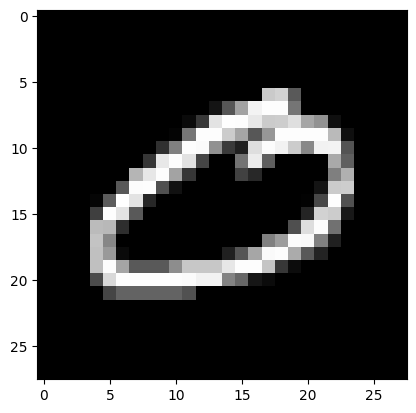

Prediction:  6
Label:  6


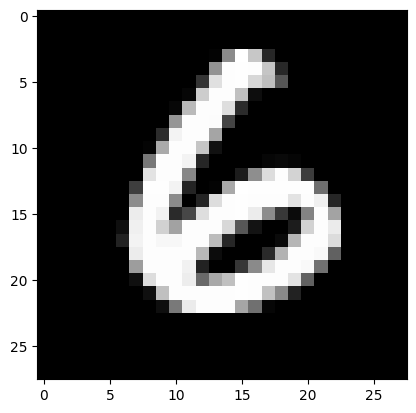

Prediction:  2
Label:  2


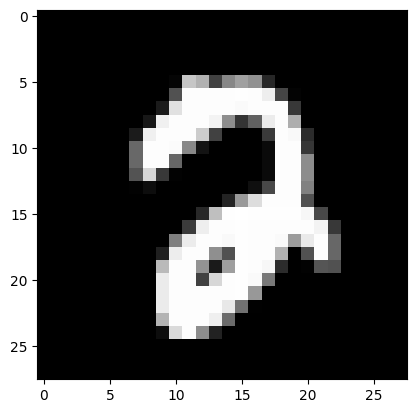

Prediction:  3
Label:  3


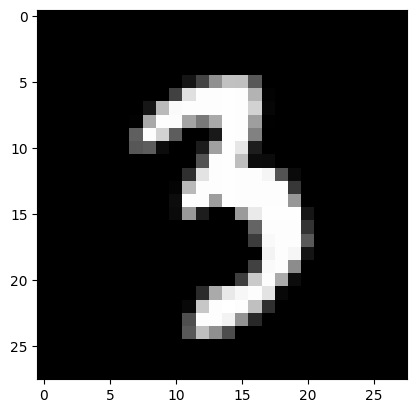

In [49]:
test_prediction(1, w1, b1, w2, b2, w3, b3)
test_prediction(2, w1, b1, w2, b2, w3, b3)
test_prediction(3, w1, b1, w2, b2, w3, b3)
test_prediction(4, w1, b1, w2, b2, w3, b3)

In [92]:
def make_predictions(X, w1, b1, w2, b2, w3, b3):
    _, _, _, _, _, A3 = ForwardProp(w1, b1, w2, b2, w3, b3, X)
    predictions = GetPred(A3)
    return predictions

def test_prediction(index, w1, b1, w2, b2, w3, b3):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], w1, b1, w2, b2, w3, b3)
    label = Y_test[index]

    return prediction[0], label

test_accuracy = 0

# Super Janked Function to test accuracy but having some issues with Shapes and Operations D: (Will fix later)
for i in range(Y_test.shape[0]):
    prediction, label = test_prediction(i, w1, b1, w2, b2, w3, b3)

    if (prediction == label):
        test_accuracy +=1
    else: continue

91.62


In [97]:
print(f"Test Set Accuracy: {(test_accuracy / Y_test.shape[0]) * 100}%")

Test Set Accuracy: 91.62%


* Cross Validation: ~92% Accuracy on Test Set :D